In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import missingno as msno
import nltk
import string
import re
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

df = pd.read_csv('transformed_data.csv')
df=df.dropna(axis=0,inplace=False)
clean_text_df = pd.read_csv('clean_text.csv')
clean_text_df=clean_text_df.dropna(axis=0,inplace=False)
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

#df['body_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
#df['punct%'] = df['text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
clean_text_df.head()

,title,text,value
0,"['trump', 'finally', 'admitted', 'something', ...","['throughout', 'donald', 'trump', 'entire', 'c...",False
1,"['president', 'obama', 'hilariously', 'skewer'...","['president', 'obama', 'took', 'aim', 'donald'...",False
2,"['interior', 'department', 'watchdog', 'drop',...","['washington', 'interior', 'department', 'insp...",True
3,"['watch', 'mika', 'brzezinski', 'turn', 'table...","['donald', 'trump', 'picked', 'fight', 'wrong'...",False
4,"['trump', 'say', 'want', 'provision', 'lower',...","['louisville', 'ky', 'president', 'donald', 't...",True


In [3]:
df.head()

,title,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2,body_len,twitter
0,Republican Jeb Bush offers U.S. education over...,WASHINGTON (Reuters) - Republican presidential...,True,-4600.0,-200.0,-4600.0,-4600.0,1.530209,2.673307,0.796907,4.541522,0
1,Idiot Pastor Loses His Damn Mind – Refuses To...,There are apparently still folks who believe t...,False,-5200.0,-200.0,-5200.0,-5200.0,1.551197,2.845656,0.807039,4.696120,0
2,BREAKING BOMBSHELL: 27 YR OLD Son Of Arkansas ...,Do black lives really matter to the Clinton s?...,False,-2600.0,-400.0,-2600.0,-2600.0,1.436214,2.527979,0.752537,4.146657,0
3,"6 SYRIAN, 1 LIBYAN MIGRANT ARRESTED After Sett...",Who still thinks Trump was wrong to say we nee...,False,-2800.0,-100.0,-2800.0,-2800.0,1.448089,2.382732,0.758002,3.938779,1
4,Trump Supporter Who Wants To Shoot Black Kids...,"Hi folks, John Harper here, at least if you as...",False,-13100.0,-300.0,-13100.0,-13100.0,1.718907,3.155921,0.886076,5.340205,0


In [4]:
df.columns

Index(['title', 'text', 'value', 'body punct%', 'title punct%', 'punct%',
       'try', 'count_punct', 'count_ws', 'try2', 'body_len', 'twitter'],
      dtype='object')

In [5]:
#df,df2= dovide(df)
df.shape

(34361, 12)

In [6]:
clean_text_df.head()

,title,text,value
0,"['trump', 'finally', 'admitted', 'something', ...","['throughout', 'donald', 'trump', 'entire', 'c...",False
1,"['president', 'obama', 'hilariously', 'skewer'...","['president', 'obama', 'took', 'aim', 'donald'...",False
2,"['interior', 'department', 'watchdog', 'drop',...","['washington', 'interior', 'department', 'insp...",True
3,"['watch', 'mika', 'brzezinski', 'turn', 'table...","['donald', 'trump', 'picked', 'fight', 'wrong'...",False
4,"['trump', 'say', 'want', 'provision', 'lower',...","['louisville', 'ky', 'president', 'donald', 't...",True


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['text', 'body_len', 'punct%']], df['value'], test_size=.45)

In [8]:
count_vect = CountVectorizer(min_df=.01, max_df=0.5)
df_DTM=pd.DataFrame(count_vect.fit_transform(X_train.text).toarray(), index=X_train.index, columns=count_vect.get_feature_names())
#df_DTM = df_DTM.drop(['reuters'], axis=1)
df_DTM.head()

,000,10,100,11,12,13,14,15,150,16,...,york,you,young,your,yourself,youth,youtu,youtube,zero,zone
22755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5618,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
16441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30361,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,2,0,0
7437,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_train['text'] = X_train['text'].apply(lambda s:re.sub(r"\b\d+\b", "", s))
X_test['text'] = X_test['text'].apply(lambda s: re.sub(r"\b\d+\b", "", s))

In [21]:
remove_words = ['reuters','(reuters)','Reuters',('Reuters')]
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
X_train['text'] = X_train['text'].str.replace(pat, '')
X_test['text'] = X_test['text'].str.replace(pat,'')

In [22]:
count_vect = CountVectorizer(min_df=.01, max_df=0.5)
df_DTM=pd.DataFrame(count_vect.fit_transform(X_train.text).toarray(), index=X_train.index, columns=count_vect.get_feature_names())
df_DTM.head()

,1990s,2017the,21st,21wire,abc,ability,able,abortion,above,abroad,...,york,you,young,your,yourself,youth,youtu,youtube,zero,zone
22755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5618,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
16441,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30361,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,2,0,0
7437,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_DTM = df_DTM.drop(['reuters'], axis=1)

KeyError: "['reuters'] not found in axis"

In [ ]:
df_DTM.head()

In [ ]:
X_train

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vect = TfidfTransformer()
#X_train.reset_index(drop=True, inplace=True)
df_DTM_tfidf = pd.DataFrame(tfidf_vect.fit_transform(df_DTM).toarray(), index = X_train.index, columns=count_vect.get_feature_names())
df_DTM_tfidf.head()

,1990s,2017the,21st,21wire,abc,ability,able,abortion,above,abroad,...,york,you,young,your,yourself,youth,youtu,youtube,zero,zone
22755,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
5618,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.027381,0.051951,0.041639,0.0,0.0,0.0,0.000000,0.0,0.0
16441,0.0,0.0,0.0,0.0,0.0,0.000000,0.045237,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
30361,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.065157,0.000000,0.000000,0.0,0.0,0.0,0.136092,0.0,0.0
7437,0.0,0.0,0.0,0.0,0.0,0.044504,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [25]:
df_DTM_test=pd.DataFrame(count_vect.transform(X_test.text).toarray(), index=X_test.index, columns=count_vect.get_feature_names())
#df_DTM = df_DTM.drop(['reuters'], axis=1)
df_DTM_test.head()


,1990s,2017the,21st,21wire,abc,ability,able,abortion,above,abroad,...,york,you,young,your,yourself,youth,youtu,youtube,zero,zone
26353,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33147,0,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,0
17621,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,1,0,0
17860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#tfidf_vect = TfidfTransformer()
df_DTM_tfidf_test = pd.DataFrame(tfidf_vect.fit_transform(df_DTM_test).toarray(), index = df_DTM_test.index, columns=count_vect.get_feature_names())
df_DTM_tfidf_test.head()

,1990s,2017the,21st,21wire,abc,ability,able,abortion,above,abroad,...,york,you,young,your,yourself,youth,youtu,youtube,zero,zone
26353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.027627,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
33147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.056351,0.000000,0.0,0.027803,0.0,0.0,0.0,0.000000,0.0,0.0
17621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.162540,0.0,0.000000,0.0,0.0,0.0,0.083006,0.0,0.0
17860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
25629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [27]:
train_df = df_DTM_tfidf.merge(df[['body punct%', 'title punct%', 'punct%',
       'count_punct', 'count_ws', 'body_len', 'twitter']], left_index=True, right_index = True)
test_df = df_DTM_tfidf_test.merge(df[['body punct%', 'title punct%', 'punct%',
       'count_punct', 'count_ws', 'body_len', 'twitter']], left_index=True, right_index = True)

In [28]:
print(X_train.shape)
print(X_test.shape)

print(train_df.shape)
print(test_df.shape)

(18898, 3)
(15463, 3)
(18898, 3132)
(15463, 3132)


In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(train_df, y_train) 
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(test_df)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, average='weighted')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3),  round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 5.906 / Predict time: 0.603 ---- Precision: 0.977 / Recall: 0.977 / Accuracy: 0.977


In [30]:
y_train

22755     True
5618     False
16441     True
30361    False
7437      True
         ...  
16182    False
28992    False
34159    False
11167     True
5293     False
Name: value, Length: 18898, dtype: bool

In [31]:
df_oos = pd.read_csv('trans.csv')
clean_text_df_oos = pd.read_csv('clean.csv')
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

#df['body_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
#df['punct%'] = df['text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [32]:
df_oos.head()

,links,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2,body_len,twitter
0,This Congress is the most diverse ever. But Hi...,"Policy staff of color, Brenson argues, would h...",T,-700.0,-200.0,-700.0,-700.0,1.241366,1.878922,0.856754,3.004922,0
1,Native Americans Finally Have a Cabinet Nomine...,"With all that in mind, the Tlingit and Indigen...",T,-800.0,-200.0,-800.0,-800.0,1.259921,2.075782,0.869229,3.346955,0
2,Merrick Garland Heads For Confirmation Hearing...,"""American Hustle, about the Abscam case; Argo,...",T,-1300.0,-100.0,-1300.0,-1300.0,1.329755,1.925728,0.911661,3.024295,0
3,This Congress is the most diverse ever. But Hi...,Even though the 117th Congress is historically...,T,-800.0,-200.0,-800.0,-800.0,1.259921,1.967454,0.868642,3.129135,0
4,Democrats question TV carriers' decisions to h...,“Free speech scholars argue that for a democra...,T,-400.0,-500.0,-400.0,-400.0,1.166529,1.931971,0.810323,3.040848,0


In [33]:
df_oos['text'] = df_oos['text'].apply(lambda s:re.sub(r"\b\d+\b", "", s))

In [34]:
df_DTM_oos=pd.DataFrame(count_vect.transform(df_oos.text).toarray(), index=df_oos.index, columns=count_vect.get_feature_names())
df_DTM_oos.head()

,1990s,2017the,21st,21wire,abc,ability,able,abortion,above,abroad,...,york,you,young,your,yourself,youth,youtu,youtube,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#tfidf_vect = TfidfTransformer()
df_DTM_tfidf_oos = pd.DataFrame(tfidf_vect.fit_transform(df_DTM_oos).toarray(), index = df_oos.index, columns=count_vect.get_feature_names())
df_DTM_tfidf_oos.head()

,1990s,2017the,21st,21wire,abc,ability,able,abortion,above,abroad,...,york,you,young,your,yourself,youth,youtu,youtube,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.154706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.205362,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
## Join Metadata
oot_df = df_DTM_tfidf_oos.merge(df[['body punct%', 'title punct%', 'punct%',
       'count_punct', 'count_ws', 'body_len', 'twitter']], left_index=True, right_index = True)

In [37]:
print(df_oos.shape)
print(oot_df.shape)

(2320, 12)
(2320, 3132)


In [38]:
start = time.time()
y_pred = rf_model.predict(oot_df)
end = time.time()
pred_time = (end - start)

value_lookup = {'T' : True, 'F' : False}
df_oos['value'] = df_oos['value'].map(value_lookup)

y_test = df_oos.value
precision, recall, fscore, train_support = score(y_test, y_pred, average='weighted')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3),  round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 5.906 / Predict time: 0.113 ---- Precision: 0.913 / Recall: 0.689 / Accuracy: 0.689


<AxesSubplot:>

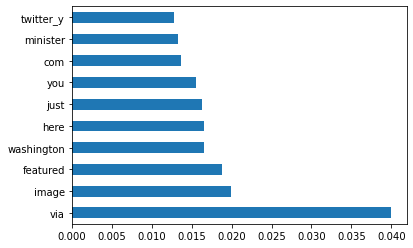

In [39]:
feat_importances = pd.Series(rf_model.feature_importances_, index=oot_df.columns)
feat_importances.nlargest(10).plot(kind='barh')